# Rapport Final Atelier de Recherche Encadrée

# La Parallaxe de Mars
 

Étudiants : Suzanne CAPILLAIRE, Benjamin GOUNER, Léa-Linh LIEBARD, Caroline MILCENT <br/>
Enseignants : Anne-Laure MELCHIOR, Serge STINCKWICH 




## 1. Introduction

Le phénomène de la parallaxe fut calculé pour la première fois en 1838 par Friedrich Bessel et apporta une preuve à la théorie héliocentrique. Mais tout d’abord, qu’est-ce que la parallaxe? 
Sa signification dépend du domaine dans lequel on l’étudie. En astronomie elle représente le changement de la position apparente d’un corps (objet ou astre) en raison d’un déplacement de l’observateur. Dans notre cas, il s’agit donc du déplacement de Mars par rapport à la Terre. <br/> 
Depuis l’Antiquité, les hommes se sont rendus compte de la trajectoire irrégulière de Mars sans lui trouver d’explication concluante. En effet, vue depuis la Terre, cette dernière ne se déplace pas comme les étoiles : sa trajectoire est d’abord prograde (de l’est vers l’ouest) mais à certains moments elle devient rétrograde : pendant un temps Mars se déplace d’ouest en est dans le ciel terrestre. Entre 1609 et 1618, Johannes Kepler, un mathématicien et astrophysicien, résolut ce problème grâce à ses trois lois. Elles permettent de comprendre le mouvement rétrograde de Mars quand on la regarde depuis la Terre. Nous allons donc expliquer ce phénomène avec une approche physique basée sur les lois de Kepler et des modélisations informatiques sur le logiciel Python.   


## 2. Le Système solaire 

Pour comprendre la parallaxe et le mouvement rétrograde de Mars, nous devons d’abord commencer par décrire le Système solaire. Ce dernier est situé sur l’un des bras de notre Galaxie, la Voie Lactée. Le Soleil se trouve en son centre et comme les masses des planètes du Système solaire sont négligeables par rapport à celle du Soleil, le centre de masse du système est placé à l’intérieur de l’étoile. Ainsi le Soleil tourne autour de ce centre de masse, donnant l'impression qu’il tourne sur lui-même. Nous trouvons ensuite huit planètes qui tournent autours du Soleil (quatre planètes rocheuses, puis après, une ceinture d'astéroïdes, deux planètes gazeuses et deux géantes des glaces), ainsi que plusieurs planètes naines, deux ceintures d’astéroïdes, des comètes et d’autres corps. Nous avons simulé à l’aide de la première kinesthésie le mouvement des planètes et des comètes (Encke et Halley) du Système Solaire. Mais dans notre cas, nous allons surtout nous intéresser à deux planètes rocheuses, la Terre et Mars, qui sont respectivement les troisième et quatrième planètes de notre système. Leur excentricité étant proche de 0, nous allons donc ici approximer leurs orbites par des cercles et non par des ellipses.<br/><br/>
Avec ce modèle simplifié et les équations du mouvement, nous avons approximé les positions relatives de la Terre et de Mars par rapport au Soleil puis des autres planètes :

![](http://localhost:8888/files/imageeq1.png)

<IPython.core.display.Javascript object>


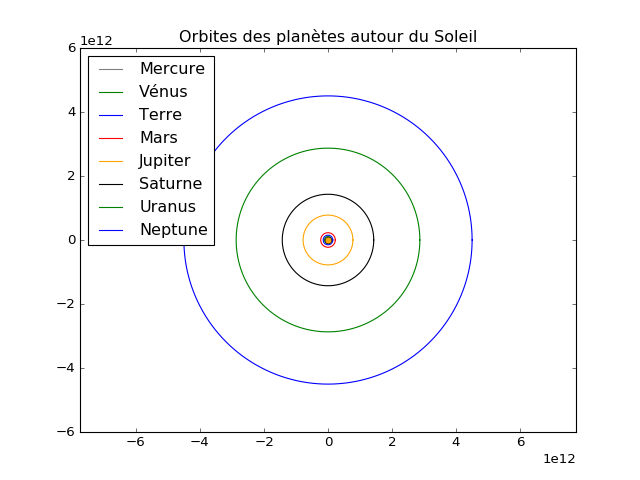

<function matplotlib.pyplot.show>

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os

UA=149597870700
jour=3600*24
annee=365*3600*24
k=2*np.pi

#Rayons des orbites des planètes
Rmercure=0.38709893*UA
Rvenus=0.723332*UA
Rterre=1*UA
Rmars=1.52366231*UA
Rjupiter=5.20336301*UA
Rsaturne=9.554909*UA
Ruranus=19.189165*UA
Rneptune=30.10366151*UA
Rsoleil=696342000

#Périodes des planètes
Tmercure=87.96934*jour
Tvenus=224.701*jour
Tterre=1*annee
Tmars=1.8808*annee
Tjupiter=11.862*annee
Tsaturne=10757.7365*jour
Turanus=84.016846*annee
Tneptune=60224.9036*jour
Tsoleil=27.28*jour

Lplanetes=[(Rmercure,Tmercure),(Rvenus,Tvenus),(Rterre,Tterre),(Rmars,Tmars),(Rjupiter,Tjupiter),
   (Rsaturne,Tsaturne),(Ruranus,Turanus),(Rneptune,Tneptune)]

#angle continu
def theta(T):
    return k*np.linspace(0, T, 1000)/T

#Listes des coordonnées des planètes
X=[R*np.cos(theta(T)) for (R,T) in Lplanetes]
Y=[R*np.sin(theta(T)) for (R,T) in Lplanetes]
#Couleurs des orbites
couleurs=['grey','green','blue','red','orange','black','green','blue']
noms=['Mercure','Vénus','Terre','Mars','Jupiter','Saturne','Uranus','Neptune']

#Coordonnées des planètes
#Mercure
xme=X[0]
yme=Y[0]
#Vénus
xv=X[1]
yv=Y[1]
#Terre
xt=X[2]
yt=Y[2]
#Mars
xma=X[3]
yma=Y[3]
#Jupiter
xj=X[4]
yj=Y[4]
#Saturne
xsa=X[5]
ysa=Y[5]
#Uranus
xu=X[6]
yu=Y[6]
#Neptune
xn=X[7]
yn=Y[7]

#Tracé des orbites
for (x,y,c,n) in zip(X,Y,couleurs,noms):
    plt.plot(x,y,color=c,linewidth=1,linestyle='-',label=n)
plt.plot(0,0,'o',color='orange')
plt.axis("equal")
plt.title("Orbites des planètes autour du Soleil")
legend(loc='upper left')
plt.show

Pour avoir plus de précision sur les orbites plus petites telles que celle de Mars ou celle de la Terre, nous avons représenté en Python le Système solaire interne. 

<IPython.core.display.Javascript object>


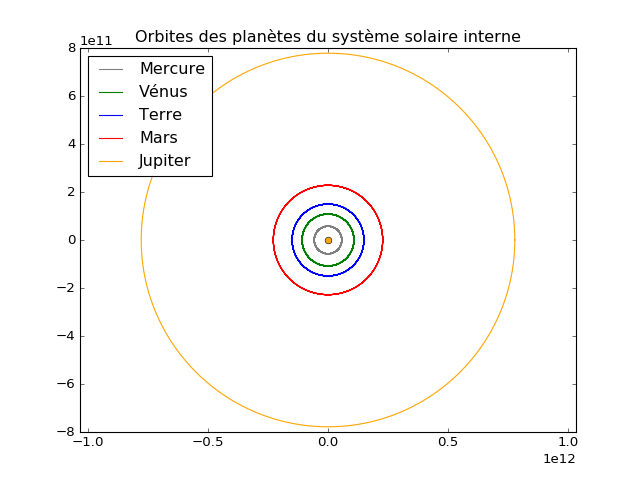

<function matplotlib.pyplot.show>

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os

UA=149597870700
jour=3600*24
annee=365*3600*24
k=2*np.pi

#Rayons des orbites des planètes
Rmercure=0.38709893*UA
Rvenus=0.723332*UA
Rterre=1*UA
Rmars=1.52366231*UA
Rjupiter=5.20336301*UA
Rsoleil=696342000

#Périodes des planètes
Tmercure=87.96934*jour
Tvenus=224.701*jour
Tterre=1*annee
Tmars=1.8808*annee
Tjupiter=11.862*annee
Tsoleil=27.28*jour

#durée de la simulation
TT=Tjupiter

Lplanetes=[(Rmercure,Tmercure),(Rvenus,Tvenus),(Rterre,Tterre),(Rmars,Tmars),(Rjupiter,Tjupiter)]

#angle continu
def theta(T):
    return k*np.linspace(0, TT, 1000)/T

#Listes des coordonnées des planètes du système solaire interne
#(Mercure, Vénus, Terre, Mars, Jupiter)
Lint=[(Rmercure,Tmercure),(Rvenus,Tvenus),(Rterre,Tterre),(Rmars,Tmars),(Rjupiter,Tjupiter)]
Xint=[R*np.cos(theta(T)) for (R,T) in Lint]
Yint=[R*np.sin(theta(T)) for (R,T) in Lint]
couleursint=['grey','green','blue','red','orange']
nomsint=['Mercure','Vénus','Terre','Mars','Jupiter']

#Tracé des orbites internes
for (x,y,c,n) in zip(Xint,Yint,couleursint,nomsint):
    plt.plot(x,y,color=c,linewidth=1,linestyle='-',label=n)
plt.plot(0,0,'o',color='orange')
plt.axis("equal")
plt.title("Orbites des planètes du système solaire interne")
legend(loc='upper left')
plt.show

Avec l'approximation des ellipses en cercle, les vitesses orbitales sont quasiment constantes. Cependant la vitesse orbitale de Mars est plus faible que celle de la Terre soit respectivement environ 24 km.s-1 et une période de 686,97 jours contre 30 km.s-1 et une période de 365,25 jours. Ainsi, une année sur Mars dure presque deux fois plus longtemps que celle sur Terre. Donc la planète bleue a le temps de faire deux périodes de révolution pendant que Mars en est toujours à sa première. <br/> <br/>
D'après ce principe, à un moment la Terre va “doubler” Mars, et c'est à ce moment que le mouvement de Mars devient rétrograde. C’est donc avec cette différence de vitesse que l’on peut observer la parallaxe de Mars que nous avons abordée en kinesthésie.




## 3. La parallaxe

La parallaxe est l’incidence du changement de position de l’observateur sur l’observation d’un objet. On peut l’utiliser dans de nombreux domaines, tous différents comme la photographie (différence de cadrage entre la visée et l’enregistrement), ou encore la  météorologie. Mais ici, nous verrons l’aspect astronomique de cette notion. 
On peut distinguer deux types de parallaxe: 

<ol> ***Parallaxe diurne :*** Elle concerne les astres du Système solaire. On place un observateur à l’équateur, l’autre au Pôle Nord (ou au Pôle Sud). On considère le triangle rectangle en O reliant le centre de la Terre, le Pôle, et le centre de Mars. On peut ensuite, avec des calculs trigonométriques, trouver l’angle “Pôle - centre de Mars - centre de la Terre” et en déduire la distance Terre-Mars.

![](http://localhost:8888/files/parallaxediurne.png)

OP est le rayon de la Terre. <br/> OM la distance Terre-Mars de centre à centre et PM la distance Terre-Mars de Pôle à centre. <br/>
L’angle E1ME2=ω représente la parallaxe diurne en P c’est celui formé en projetant PM sur une étoile lointaine et OM sur un autre étoile lointaine. <br/> <br/>

***Parallaxe annuelle :*** Elle concerne les astres qui sont hors du Système solaire. Au lieu d’utiliser la longueur du rayon de la Terre, on va plutôt prendre le demi-grand axe Soleil-Terre. On place le premier point sur le Soleil, un autre sur le “Pôle”, c’est à dire la Terre, et le troisième sur une étoile très lointaine. On peut également l’utiliser au sein du système solaire comme ici mais elle est surtout utile pour les astres plus lointains car le “rayon” utilisé (ici le demi-grand axe) est plus grand ce qui procure une meilleure précision.


![](http://localhost:8888/files/parallaxeannuelle.png)

Dans ce cas, ST est le demi grand axe, M représente une étoile proche et E1 et E2 des étoiles lointaines. <br/>
L’angle SMT=E1ME2 = ω représente la parallaxe annuelle.  </ol>

Ainsi, en utilisant le parallaxe diurne, nous pouvons projeter le déplacement de Mars par rapport à la Terre. Nous avons alors pu constater que Mars avait un mouvement rétrograde c’est-à-dire que dans le ciel de la Terre, la planète rouge effectue des “boucles”.  <br/>


## 4. La kinesthésie et le mouvement rétrograde <br/>

Durant cette séance de kinesthésie, nous avons projeté les positions de Marsdans le ciel de la Terre. Un étudiant représentait la Terre (casquette bleue), un autre Mars (casquette rouge) et le reste, les étoiles lointaines où sont projetées les positions de Mars par rapport à la Terre. Avec l’aide d’une corde, les étudiants (qui ne représentaient pas les planètes) devaient se placer de telle sorte à ce que la corde reste alignée avec les deux planètes et la position de l’étudiant. La distance entre chaque point de la bâche représente une durée de plus ou moins quatorze jours.  <br/>
Nous avons alors remarqué que Mars avait une trajectoire insolite. En effet, cette dernière donne l’impression de reculer de temps en temps. Donc si l’on regarde Mars depuis la Terre, on constate que la planète rouge a un mouvement rétrograde (elle change de sens) à un moment donné. <br/>
Avant de rentrer plus en détail dans les explications, il faut d’abord souligner qu’afin d’étudier le mouvement rétrograde de Mars, il faut choisir un référentiel fixe. On choisira l'ensemble des étoiles lointaines. C'est donc par rapport aux étoiles fixes que ce mouvement apparent est mesuré. 


![](http://localhost:8888/files/kinesthesie.png)


Cette simulation de kinesthésie permet de bien comprendre le phénomène. L’étudiant avec la casquette bleue représente la Terre, et celui avec la casquette rouge représente Mars. L'orbite bleue représente la trajectoire de la Terre et la rouge celle de Mars. Les points représentent les positions de ces deux planètes aux mêmes  instants donnés. Les traits bleus représentent l’observation de Mars par un observateur terrien lorsque Mars est devant la Terre. Les points bleus, situés sur la position des étudiants, sont les projections des positions relatives Terre-Mars sur le ciel. On remarque que lorsque la Terre “double” Mars, (représenté par les traits rouges), alors la position relative de Mars par rapport à la Terre recule sur sa trajectoire (les points rouges). Une fois  que la Terre a “doublé” Mars (traits bleu foncés) la trajectoire projetée dans le ciel (courbe noire) reprend son trajet initial prograde. On remarque donc que la trajectoire crée une boucle dans le ciel au fil des jours. C'est le mouvement rétrograde qui est dû à une différence de vitesse angulaire entre les deux planètes. En temps normal, Mars a une trajectoire prograde, il n’y a pas de décalage orbital. Mais pour mieux voir et comprendre son mouvement, on  prend différentes positions. <br/>

Pour représenter ce mouvement plus précisément, nous avons utilisé plusieurs méthodes. <br/>
Avant de représenter le mouvement rétrograde avec la parallaxe, nous avons commencé par appliquer les équations du mouvement de Mars dans le référentiel géocentrique.  

![](http://localhost:8888/files/imageeq2.png)

On remarque que Mars fait des sortes de “boucles” ce qui représente le mouvement rétrograde.





In [ ]:
#Animation Terre-Mars
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os

UA=149597870700
jour=3600*24
annee=365*3600*24
tau=2*np.pi

Rterre=1*UA
Rmars=1.52366231*UA
Rsoleil=696342000

Tterre=1*annee
Tmars=1.8808*annee
Tsoleil=27.28*jour

#Durée de la simulation
TT=3*Tmars
#Pas de temps de la simulation
pas=10*jour

#angle continu
def theta(T):
    return tau*np.linspace(0, TT, TT/pas)/T

#Orbites des planètes
#Terre
xt=Rterre*np.cos(theta(Tterre))
yt=Rterre*np.sin(theta(Tterre))
#Mars
xma=Rmars*np.cos(theta(Tmars))
yma=Rmars*np.sin(theta(Tmars))

D=np.sqrt((xma-xt)**2+(yma-yt)**2)
 
# Construction d'une série d'images et de leur assemblage dans une animation 
for k in range(int(TT/jour)): 
    #Orbite de la Terre
    plt.plot(xt,yt,color='blue',linewidth=1,linestyle='-')
    #Orbite de Mars
    plt.plot(xma,yma,color='red',linewidth=1,linestyle='-')
    #Soleil
    plt.plot(0,0,'o',color='orange',markersize=16, label='Soleil')
    #Positions de la Terre
    plt.plot(xt[k], yt[k], 'o', color='blue',markersize=8, label='Terre')
    #Positions de Mars
    plt.plot(xma[k], yma[k], 'o', color='red',markersize=8, label='Mars')
    #droite Terre-Mars
    plt.plot([xt[k], xma[k]], [yt[k], yma[k]], color='black',linewidth=1,linestyle='-')
    plt.axis('equal')
    plt.title('Mouvement de la Terre et de Mars')
    legend(loc='upper left')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()
    


<IPython.core.display.Javascript object>

In [ ]:
#Mouvement de Mars dans le référentiel géocentrique
from __future__ import division 
from scipy import *                  
from pylab import * 
import os
%matplotlib notebook

for k in range(int(TT/jour)): 
    #Position de Mars dans le référentiel géocentrique
    plt.plot(xma-xt,yma-yt,color='red',linewidth=1,linestyle='-.')
    plt.plot(xma[k]-xt[k],yma[k]-yt[k], 'o', color='red', markersize=8, label='Mars')
    plt.axis('equal')
    plt.title('Mouvement de Mars dans le référentiel géocentrique')
    legend(loc='upper left')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()

Ensuite, nous avons représenté le mouvement de Mars dans le ciel de la Terre avec la parallaxe diurne.

In [1]:
def mvt_retro():
    L=[]
    for k in range(2,len(yt)):
        #coefficient directeur de la droite Terre-Mars
        a=(yma-yt[k])/(xma-xt[k])
        #Projection dans le ciel: 
        #ordonnée
        yp=[1e12 for k in range(len(yt))]
        #abscisse
        xp=yp/a
        if xp[k]>xp[k-1]:
            L.append(k)
    return L
mvt_retro()

NameError: name 'yt' is not defined

Pour calculer la projection de Mars dans le ciel terrestre, nous avons prolongé la droite qui relie la Terre et Mars jusqu’à ce qu’elle coupe une droite supposée suffisamment loin du système solaire, censée représenter les étoiles lointaines du fond du ciel terrestre. On observe que le point de cette intersection qui correspond à la position de Mars vue depuis la Terre a un mouvement rétrograde à un moment donné. Ceci veut donc dire que Mars “retourne en arrière” dans le ciel de la Terre. Nous avons donc représenté le mouvement rétrograde grâce à la parallaxe. (La trajectoire de Mars commence par la flèche noire, puis celle en rouge et termine avec celle en bleue).



## 5. Conclusion

Afin de bien comprendre notre sujet et ce que l’on avait montré en kinesthésie, nous avons tout d’abord étudié le mouvement des planètes du Système solaire et plus particulièrement le système que constituent le Soleil, la Terre et Mars. Nous avons ainsi analysé le mouvement rétrograde et de quelle manière ce dernier se manifeste pour un observateur terrien. Nous avons ensuite analysé la méthode de détection de la parallaxe diurne, avec une projection sur le ciel afin de simuler ces observations sur Python. <br/>
Cependant, avant de parvenir à cette simulation finale, nous avons dû simuler le Système Solaire et effectuer un changement de référentiel pour nous placer dans un référentiel géocentrique.<br/>
Pour finir, l’affichage de nos données sous forme de graphes et d’animations nous permettent d’avoir une bonne visualisation du mouvement rétrograde de Mars.

## 6. Annexe

Nous avons aussi réalisé une simulation du mouvement rétrograde de plusieurs planètes dans le Système solaire. Nous avons appliqué la même méthode que pour le mouvement rétrograde de Mars sur Mercure,Vénus et Jupiter. (Voir Code simulation système solaire interne).

In [5]:
In [4]:
#Animation système solaire interne
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from scipy import *             
from pylab import *
import os

UA=149597870700
jour=3600*24
annee=365*3600*24
tau=2*np.pi

#Rayons des orbites des planètes
Rmercure=0.38709893*UA
Rvenus=0.723332*UA
Rterre=1*UA
Rmars=1.52366231*UA
Rjupiter=5.20336301*UA

#Périodes orbitales
Tmercure=87.96934*jour
Tvenus=224.701*jour
Tterre=1*annee
Tmars=1.8808*annee
Tjupiter=11.862*annee

#angle continu
def theta(T):
    return (tau*np.linspace(0, TT, TT/pas)/T)%tau

#Durée de la simulation
TT=3*Tjupiter
#Pas de temps de la simulation
pas=1*jour

#Orbites des planètes du système solaire interne
#Mercure
xme=Rmercure*np.cos(theta(Tmercure))
yme=Rmercure*np.sin(theta(Tmercure))
#Vénus
xv=Rvenus*np.cos(theta(Tvenus))
yv=Rvenus*np.sin(theta(Tvenus))
#Terre
xt=Rterre*np.cos(theta(Tterre))
yt=Rterre*np.sin(theta(Tterre))
#Mars
xma=Rmars*np.cos(theta(Tmars))
yma=Rmars*np.sin(theta(Tmars))
#Jupiter
xj=Rjupiter*np.cos(theta(Tjupiter))
yj=Rjupiter*np.sin(theta(Tjupiter))



 
# Construction d'une série d'images et de leur assemblage dans une animation 
for k in range(0,int(TT/jour),10): 
    #Orbite de la Terre
    plt.plot(xt,yt,color='blue',linewidth=1,linestyle='-')
    #Orbite de Mercure
    plt.plot(xme,yme,color='grey',linewidth=1,linestyle='-')
    #Orbite de Vénus
    plt.plot(xv,yv,color='green',linewidth=1,linestyle='-')
    #Orbite de Mars
    plt.plot(xma,yma,color='red',linewidth=1,linestyle='-')
    #Orbite de Jupiter
    plt.plot(xj,yj,color='orange',linewidth=1,linestyle='-')
    #Soleil
    plt.plot(0,0,'o',color='orange',markersize=12, label='Soleil')
    #Positions de la Terre
    plt.plot(xt[k], yt[k], 'o', color='blue',markersize=8, label='Terre')
    #Positions de Mercure
    plt.plot(xme[k], yme[k], 'o', color='grey',markersize=6, label='Mercure')
    #Positions de Vénus
    plt.plot(xv[k], yv[k], 'o', color='green',markersize=8, label='Vénus')
    #Positions de Mars
    plt.plot(xma[k], yma[k], 'o', color='red',markersize=8, label='Mars')
    #Positions de Jupiter
    plt.plot(xj[k], yj[k], 'o', color='orange',markersize=10, label='Jupiter')
    plt.axis('equal')
    xticks([2*n*UA for n in range(-4,5)],[str(2*n)+' UA' for n in range(-4,5)])
    yticks([n*UA for n in range(-5,6)],[str(n)+' UA' for n in range(-5,6)])
    legend(loc='upper left')
    plt.title('Simulation système solaire interne')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf') 
    clf()

SyntaxError: invalid syntax (<ipython-input-5-1800a615f0b2>, line 1)

In [6]:
from __future__ import division 
from scipy import *                  
from pylab import * 
import os
%matplotlib notebook

#dates de début et de fin de la simulation
debut=1350
fin=len(yt)


#Projection de Mercure dans le ciel en fonction du temps (référentiel géocentrique)
for k in range(debut,fin,10): 
    #Orbite de la Terre
    plt.plot(xt-xt[k],yt-yt[k],color='blue',linewidth=1,linestyle='-')
    #Orbite de Mercure
    plt.plot(xme-xt[k],yme-yt[k],color='grey',linewidth=1,linestyle='-')
    #Orbite de Vénus
    plt.plot(xv-xt[k],yv-yt[k],color='green',linewidth=1,linestyle='-')
    #Orbite de Mars
    plt.plot(xma-xt[k],yma-yt[k],color='red',linewidth=1,linestyle='-')
    #Orbite de Jupiter
    plt.plot(xj-xt[k],yj-yt[k],color='orange',linewidth=1,linestyle='-')
    #Terre
    plt.plot(0,0,'o',color='blue',markersize=8, label='Terre')
    #Positions du Soleil
    plt.plot(-xt[k], -yt[k], 'o', color='orange',markersize=16, label='Soleil')
    #Positions de Mercure
    plt.plot(xme[k]-xt[k], yme[k]-yt[k], 'o', color='grey',markersize=8, label='Mercure')
    #Positions de Vénus
    plt.plot(xv[k]-xt[k], yv[k]-yt[k], 'o', color='green',markersize=8, label='Vénus')
    #Positions de Mars
    plt.plot(xma[k]-xt[k], yma[k]-yt[k], 'o', color='red',markersize=8, label='Mars')
    #Positions de Jupiter
    plt.plot(xj[k]-xt[k], yj[k]-yt[k], 'o', color='orange',markersize=8, label='Jupiter')
    #droite Terre-Mercure
    plt.plot([0, xme[k]-xt[k]], [0, yme[k]-yt[k]], color='black',linewidth=1,linestyle='-')
    #coefficient directeur de la droite Terre-Mercure
    a=(yme-yt[k])/(xme-xt[k])
    #Projection dans le ciel: 
    #ordonnée
    yp=[2e12 for k in range(len(yt))]
    #abscisse
    xp=yp/a
    #Projection de Mercure dans le ciel
    plt.plot(np.linspace(-15*UA,15*UA,len(yp)),yp,color='green')
    plt.plot(xp[k], yp[k], 'o', color='green', markersize=8, label='Projection')
    #droite Mercure-Projection
    plt.plot([xme[k]-xt[k], xp[k]], [yme[k]-yt[k], yp[k]], color='black',linewidth=1,linestyle='-')
    legend(loc='lower left')
    plt.xlim(-2e12,2e12)
    plt.ylim(-3e11,2.4e12)
    xticks([3*n*UA for n in range(-4,5)],[str(3*n)+' UA' for n in range(-4,5)])
    yticks([n*UA for n in range(-3,17)],[str(n)+' UA' for n in range(-3,17)])
    plt.title('Mouvement de la Terre et de Mercure (jour:'+str(k)+')')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()

NameError: name 'yt' is not defined

In [7]:

from __future__ import division 
from scipy import *                  
from pylab import * 
import os
%matplotlib notebook

#dates de début et de fin de la simulation
debut=1100
fin=len(yt)


#Projection de Vénus dans le ciel en fonction du temps (référentiel géocentrique)
for k in range(debut,fin,10): 
    #Orbite de la Terre
    plt.plot(xt-xt[k],yt-yt[k],color='blue',linewidth=1,linestyle='-')
    #Orbite de Mercure
    plt.plot(xme-xt[k],yme-yt[k],color='grey',linewidth=1,linestyle='-')
    #Orbite de Vénus
    plt.plot(xv-xt[k],yv-yt[k],color='green',linewidth=1,linestyle='-')
    #Orbite de Mars
    plt.plot(xma-xt[k],yma-yt[k],color='red',linewidth=1,linestyle='-')
    #Orbite de Jupiter
    plt.plot(xj-xt[k],yj-yt[k],color='orange',linewidth=1,linestyle='-')
    #Terre
    plt.plot(0,0,'o',color='blue',markersize=8, label='Terre')
    #Positions du Soleil
    plt.plot(-xt[k], -yt[k], 'o', color='orange',markersize=16, label='Soleil')
    #Positions de Mercure
    plt.plot(xme[k]-xt[k], yme[k]-yt[k], 'o', color='grey',markersize=8, label='Mercure')
    #Positions de Vénus
    plt.plot(xv[k]-xt[k], yv[k]-yt[k], 'o', color='green',markersize=8, label='Vénus')
    #Positions de Mars
    plt.plot(xma[k]-xt[k], yma[k]-yt[k], 'o', color='red',markersize=8, label='Mars')
    #Positions de Jupiter
    plt.plot(xj[k]-xt[k], yj[k]-yt[k], 'o', color='orange',markersize=8, label='Jupiter')
    #droite Terre-Vénus
    plt.plot([0, xv[k]-xt[k]], [0, yv[k]-yt[k]], color='black',linewidth=1,linestyle='-')
    #coefficient directeur de la droite Terre-Vénus
    a=(yv-yt[k])/(xv-xt[k])
    #Projection dans le ciel: 
    #ordonnée
    yp=[2e12 for k in range(len(yt))]
    #abscisse
    xp=yp/a
    #Projection de Vénus dans le ciel
    plt.plot(np.linspace(-15*UA,15*UA,len(yp)),yp,color='blue')
    plt.plot(xp[k], yp[k], 'o', color='blue', markersize=8, label='Projection')
    #droite Vénus-Projection
    plt.plot([xv[k]-xt[k], xp[k]], [yv[k]-yt[k], yp[k]], color='black',linewidth=1,linestyle='-')
    legend(loc='lower left')
    plt.xlim(-2e12,2e12)
    plt.ylim(-3e11,2.4e12)
    xticks([3*n*UA for n in range(-4,5)],[str(3*n)+' UA' for n in range(-4,5)])
    yticks([n*UA for n in range(-3,17)],[str(n)+' UA' for n in range(-3,17)])
    plt.title('Mouvement de la Terre et de Vénus (jour:'+str(k)+')')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()

NameError: name 'yt' is not defined

In [8]:

from __future__ import division 
from scipy import *                  
from pylab import * 
import os
%matplotlib notebook

#dates de début et de fin de la simulation
debut=1100
fin=len(yt)


#Projection de Jupiter dans le ciel en fonction du temps (référentiel géocentrique)
for k in range(debut,fin,10): 
    #Orbite de la Terre
    plt.plot(xt-xt[k],yt-yt[k],color='blue',linewidth=1,linestyle='-')
    #Orbite de Mercure
    plt.plot(xme-xt[k],yme-yt[k],color='grey',linewidth=1,linestyle='-')
    #Orbite de Vénus
    plt.plot(xv-xt[k],yv-yt[k],color='green',linewidth=1,linestyle='-')
    #Orbite de Mars
    plt.plot(xma-xt[k],yma-yt[k],color='red',linewidth=1,linestyle='-')
    #Orbite de Jupiter
    plt.plot(xj-xt[k],yj-yt[k],color='orange',linewidth=1,linestyle='-')
    #Terre
    plt.plot(0,0,'o',color='blue',markersize=8, label='Terre')
    #Positions du Soleil
    plt.plot(-xt[k], -yt[k], 'o', color='orange',markersize=16, label='Soleil')
    #Positions de Mercure
    plt.plot(xme[k]-xt[k], yme[k]-yt[k], 'o', color='grey',markersize=8, label='Mercure')
    #Positions de Vénus
    plt.plot(xv[k]-xt[k], yv[k]-yt[k], 'o', color='green',markersize=8, label='Vénus')
    #Positions de Mars
    plt.plot(xma[k]-xt[k], yma[k]-yt[k], 'o', color='red',markersize=8, label='Mars')
    #Positions de Jupiter
    plt.plot(xj[k]-xt[k], yj[k]-yt[k], 'o', color='orange',markersize=8, label='Jupiter')
    #droite Terre-Jupiter
    plt.plot([0, xj[k]-xt[k]], [0, yj[k]-yt[k]], color='black',linewidth=1,linestyle='-')
    #coefficient directeur de la droite Terre-Jupiter
    a=(yj-yt[k])/(xj-xt[k])
    #Projection dans le ciel: 
    #ordonnée
    yp=[2e12 for k in range(len(yt))]
    #abscisse
    xp=yp/a
    #Projection de Jupiter dans le ciel
    plt.plot(np.linspace(-15*UA,15*UA,len(yp)),yp,color='green')
    plt.plot(xp[k], yp[k], 'o', color='green', markersize=8, label='Projection')
    #droite Jupiter-Projection
    plt.plot([xj[k]-xt[k], xp[k]], [yj[k]-yt[k], yp[k]], color='black',linewidth=1,linestyle='-')
    legend(loc='lower left')
    plt.xlim(-2e12,2e12)
    plt.ylim(-3e11,2.4e12)
    xticks([3*n*UA for n in range(-4,5)],[str(3*n)+' UA' for n in range(-4,5)])
    yticks([n*UA for n in range(-3,17)],[str(n)+' UA' for n in range(-3,17)])
    plt.title('Mouvement de la Terre et de Jupiter (jour:'+str(k)+')')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()
    

NameError: name 'yt' is not defined